# Imports and variables

In [27]:
import pickle
import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from src.results import get_panel_data, get_best_scores_table, get_scores_skills_table, get_pi_coverage_table, get_pit

In [42]:
ens_method = "rand_init"
ens_method_ls = [
    "rand_init",
    "bagging",
    "batchensemble",
    "bayesian",
    "mc_dropout",
    "concrete_dropout",
    "variational_dropout",
]
ens_method_labels = {
    "rand_init": "Naive",
    "bagging": "Bagging",
    "batchensemble": "BatchEns.",
    "bayesian": "Bayesian",
    "mc_dropout": "MC Drop.",
    "variational_dropout": "Var. Drop.",
    "concrete_dropout": "Conc. Drop.",
}
dataset_ls = [
    "scen_1",
    "scen_4",
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]
dataset_labels = {
    "scen_1": "Scenario 1 \n (N=16,000)",
    "scen_4": "Scenario 2 \n (N=16,000)",
    "boston": "Boston Housing \n (N=506)",
    "concrete": "Concrete Strength \n (N=1,030)",
    "energy": "Energy Efficiency \n (N=768)",
    "kin8nm": "Kin8nm \n (N=8,192)",
    "naval": "Naval Propulsion \n (N=11,934)",
    "power": "Power Plant \n (N=9,568)",
    "protein": "Protein Structure \n (N=45,730)",
    "wine": "Red Wine Quality \n (N=1,599)",
    "yacht": "Yacht\n Hydrodynamics \n (N=308)"
}
dataset_labels_short = {
    "scen_1": "Scenario 1",
    "scen_4": "Scenario 2",
    "boston": "Boston Housing",
    "concrete": "Concrete Strength",
    "energy": "Energy Efficiency",
    "kin8nm": "Kin8nm",
    "naval": "Naval Propulsion",
    "power": "Power Plant",
    "protein": "Protein Structure",
    "wine": "Red Wine Quality",
    "yacht": "Yacht Hydrodynamics"
}
agg_labels = {
    "opt": "OPT",
    "ens": "ENS",
    "lp": r"$LP$",
    "vi": r"$V_0^=$",
    "vi-a": r"$V_a^=$",
    "vi-w": r"$V_0^w$",
    "vi-aw": r"$V_a^w$",
}

In [29]:
# Get colors
agg_cols = sns.color_palette("Dark2", 8, as_cmap=True)
# Colors of aggregation methods
agg_col = {
    "lp": agg_cols.colors[4],  # type: ignore
    "vi": agg_cols.colors[5],  # type: ignore
    "vi-a": agg_cols.colors[2],  # type: ignore
    "vi-w": agg_cols.colors[0],  # type: ignore
    "vi-aw": agg_cols.colors[3],  # type: ignore
    "ens": agg_cols.colors[7],  # type: ignore
    "opt": agg_cols.colors[1],  # type: ignore
}

greens = sns.color_palette("Greens", 2, as_cmap=False)
blues = sns.color_palette("Blues", 1)
purples = sns.color_palette("Purples", 1)
reds = sns.color_palette("Reds", 3)
ens_col = {
    "rand_init": greens[1], #multi_model_cols.colors[0],  # type: ignore
    "bagging": greens[0], #multi_model_cols.colors[1],  # type: ignore
    "batchensemble": blues[0], #multi_model_cols.colors[3],  # type: ignore
    "bayesian": purples[0], #multi_model_cols.colors[8],  # type: ignore
    "mc_dropout": reds[2], #dropout_cols.colors[14],  # type: ignore
    "variational_dropout": reds[1], #dropout_cols.colors[16],  # type: ignore
    "concrete_dropout": reds[0], #dropout_cols.colors[15],  # type: ignore
}

# KIT colors
kit_cols_dict = {
    "green": "#00876C",
    "blue": "#4664AA",
    "black": "#000000",
    "grey": "#404040",
}

In [30]:
score_vec = ["crps", "crpss", "me", "lgt", "cov", "a", "w"]
nn_vec = ["drn", "bqn"]
n_ens_vec = np.arange(start=2, stop=20 + 2, step=2)
agg_meths = ["lp", "vi", "vi-a", "vi-w", "vi-aw"]

In [31]:
export = True
save_dir = os.path.join("plots", "results")

# Get data

In [32]:
drn_choice = {
    "scen_1": "norm",
    "scen_4": "norm",
    'boston': '0tnorm',
    'concrete': '0tnorm',
    'energy': '0tnorm',
    'kin8nm': '0tnorm',
    'naval': '0tnorm',
    'power': 'norm',
    'protein': 'norm',
    'wine': 'tnorm',
    'yacht': '0tnorm',
}

bqn_choice = {
    "scen_1": "norm",
    "scen_4": "norm",
    'boston': '0tnorm',
    'concrete': '0tnorm',
    'energy': '0tnorm',
    'kin8nm': '0tnorm',
    'naval': '0tnorm',
    'power': 'norm',
    'protein': 'norm',
    'wine': 'tnorm',
    'yacht': '0tnorm',
}

paths = {
    "norm": os.path.join("..", "..", "04_Experiments", "Normal_final"),
    "tnorm": os.path.join("..", "..", "04_Experiments", "t_Normal_final"),
    "0tnorm": os.path.join("..", "..", "04_Experiments", "0t_Normal_final"),    
}



In [33]:
df = get_pi_coverage_table(paths, drn_choice, bqn_choice, dataset_ls, score_vec, nn_vec, n_ens_vec, agg_meths, ens_method_ls)

c:\Users\koehl\Documents\Studium\22-23 WS\Masterarbeit\02_Repos\agg_distr_deep_ens\src\results.py:565: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["ens_method"] = ens_method
c:\Users\koehl\Documents\Studium\22-23 WS\Masterarbeit\02_Repos\agg_distr_deep_ens\src\results.py:566: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["distr"] = drn_choice.get(dataset)
c:\Users\koehl\Documents\Studium\22-23 WS\Masterarbeit\02_Repos\agg_distr_deep_ens\src\results.py:565: SettingWithCopyWarning: 
A valu

In [34]:
df["score"] = df["score"].replace({0: np.nan})
df[df["score"].isna()]

,dataset,nn,metric,n_ens,agg,score,ens_method,distr
560,boston,drn,lgt,2,opt,NaN,rand_init,0tnorm
567,boston,drn,lgt,4,opt,NaN,rand_init,0tnorm
574,boston,drn,lgt,6,opt,NaN,rand_init,0tnorm
581,boston,drn,lgt,8,opt,NaN,rand_init,0tnorm
588,boston,drn,lgt,10,opt,NaN,rand_init,0tnorm
...,...,...,...,...,...,...,...,...
21525,yacht,bqn,cov,12,opt,NaN,variational_dropout,0tnorm
21532,yacht,bqn,cov,14,opt,NaN,variational_dropout,0tnorm
21539,yacht,bqn,cov,16,opt,NaN,variational_dropout,0tnorm
21546,yacht,bqn,cov,18,opt,NaN,variational_dropout,0tnorm


# Final plots

## Scatter plot - Coverage

C:\Users\koehl\AppData\Local\Temp\ipykernel_11832\1903638132.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
C:\Users\koehl\AppData\Local\Temp\ipykernel_11832\1903638132.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
C:\Users\koehl\AppData\Local\Temp\ipykernel_11832\1903638132.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
C:\Users\koehl\AppData\Local\Temp\ipykernel_11832\1903638132.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_

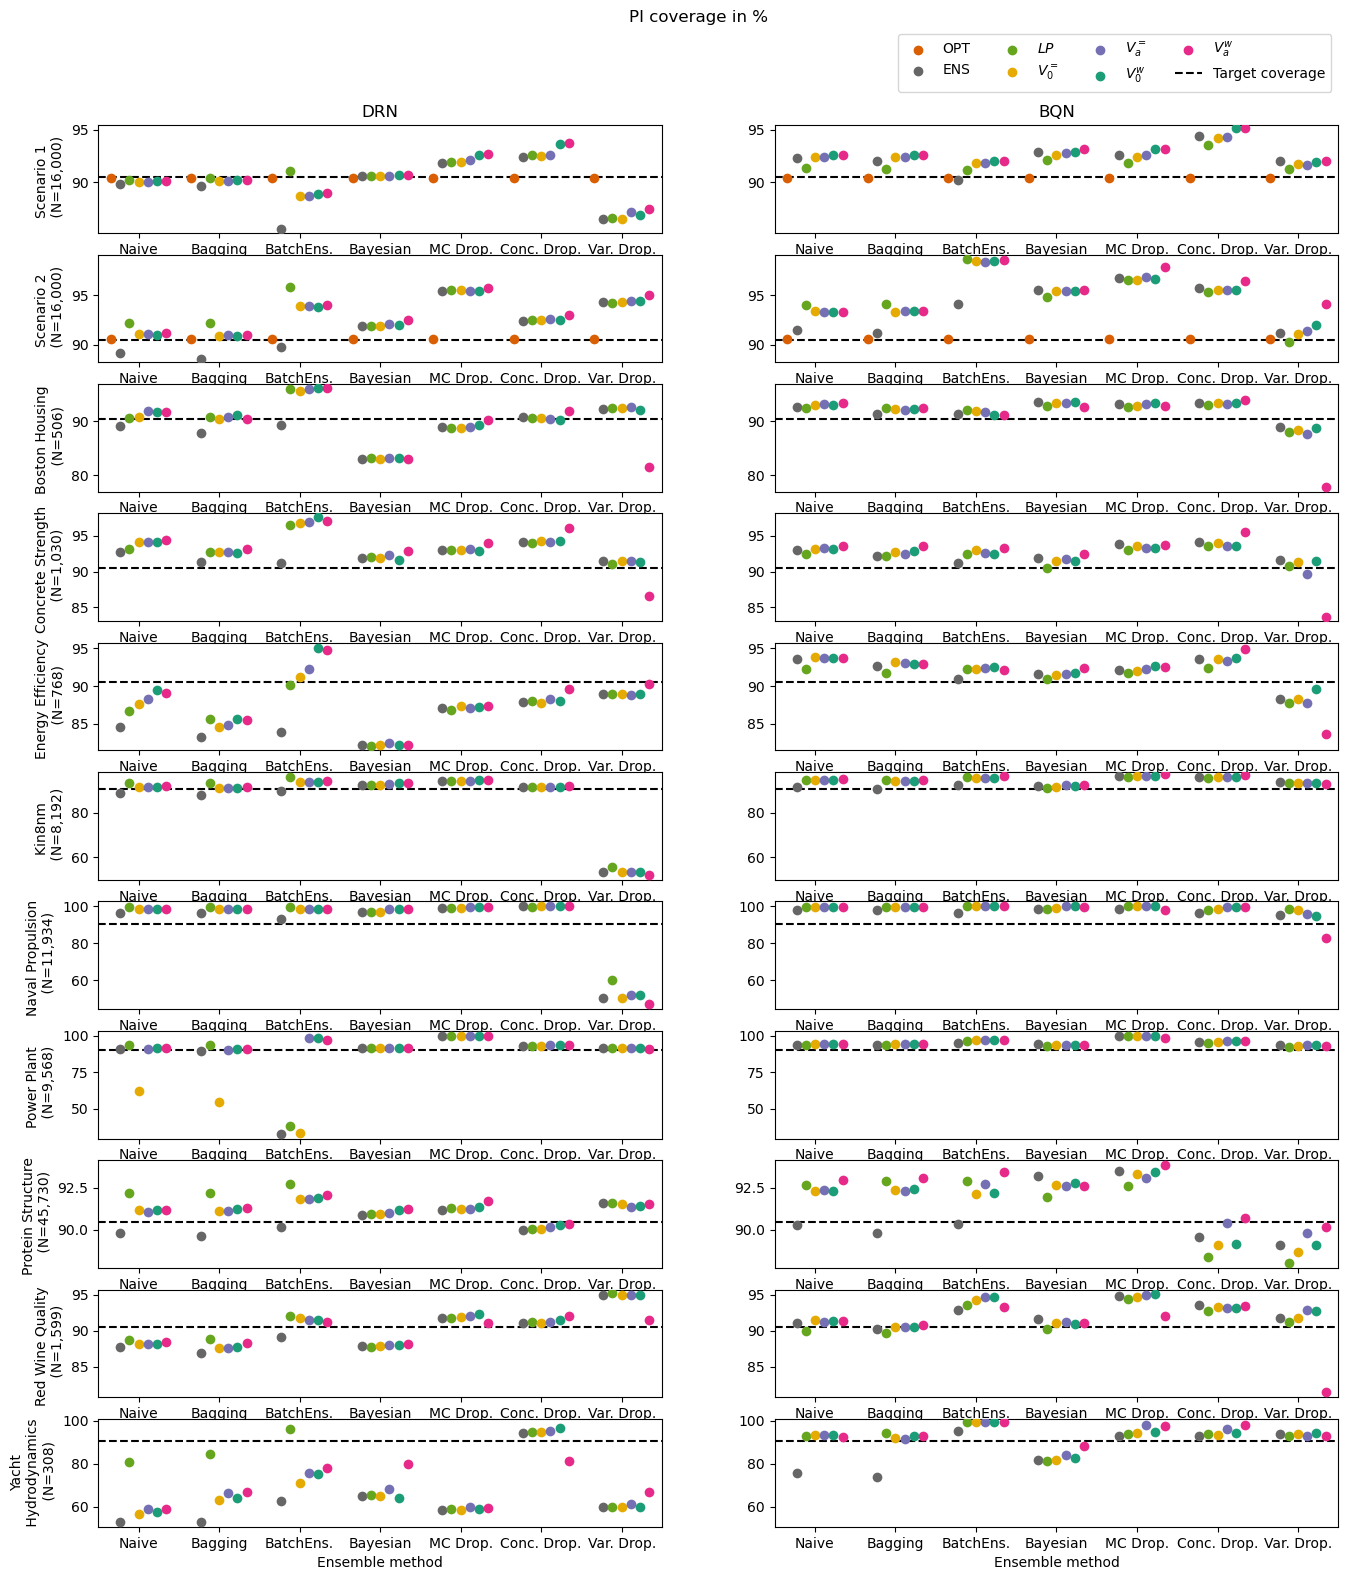

In [36]:
##### Scores - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(16,16*1.2), squeeze=False)

# Filter out optimal score
df_cov = df[(df["metric"] == "cov")]

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    # df_nn = pd.melt(df_scores[i_nn].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_nn].columns, value_name="score")
    df_nn = df_cov[df_cov["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[df_nn["dataset"] == dataset]
        
        
        # Plot boxplots
        # g = sns.stripplot(data=df_nn_dataset, x="ens_method", y="score", hue="agg", ax=axs[i_dataset][i_nn], palette=agg_col, dodge=True, s=3, facecolor="none", order=ens_method_ls)
        g = sns.stripplot(data=df_nn_dataset[df_nn_dataset["n_ens"] == 20], x="ens_method", y="score", hue="agg", ax=axs[i_dataset][i_nn], palette=agg_col, dodge=True, s=7, order=ens_method_ls)
        
        # Add 0 line
        g.axhline((100 * 19 / 21), linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Ensemble method")
        

# Set y axis range
# upper_limit = np.Inf
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()

    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    

# Merge subplot legends and display figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
small_marker = matplotlib.lines.Line2D([0], [0], color=kit_cols_dict["grey"], marker="o", linestyle="none", markersize=3)  # type: ignore
big_marker = matplotlib.lines.Line2D([0], [0], color=kit_cols_dict["grey"], marker="o", linestyle="none", markersize=7)  # type: ignore
handles.append(axhline)
# handles.append(small_marker)
# handles.append(big_marker)
labels = [agg_labels.get(agg) for agg in labels]
labels.append("Target coverage")
# labels.append("Ensemble size < 20")
# labels.append("Ensemble size = 20")

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.84)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.891), ncol=4)
fig.suptitle(f"PI coverage in %", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "04_coverage.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "04_coverage.png")
    fig.savefig(filename, bbox_inches='tight')

## PI length

C:\Users\koehl\AppData\Local\Temp\ipykernel_11832\57102205.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
C:\Users\koehl\AppData\Local\Temp\ipykernel_11832\57102205.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
C:\Users\koehl\AppData\Local\Temp\ipykernel_11832\57102205.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
C:\Users\koehl\AppData\Local\Temp\ipykernel_11832\57102205.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_l

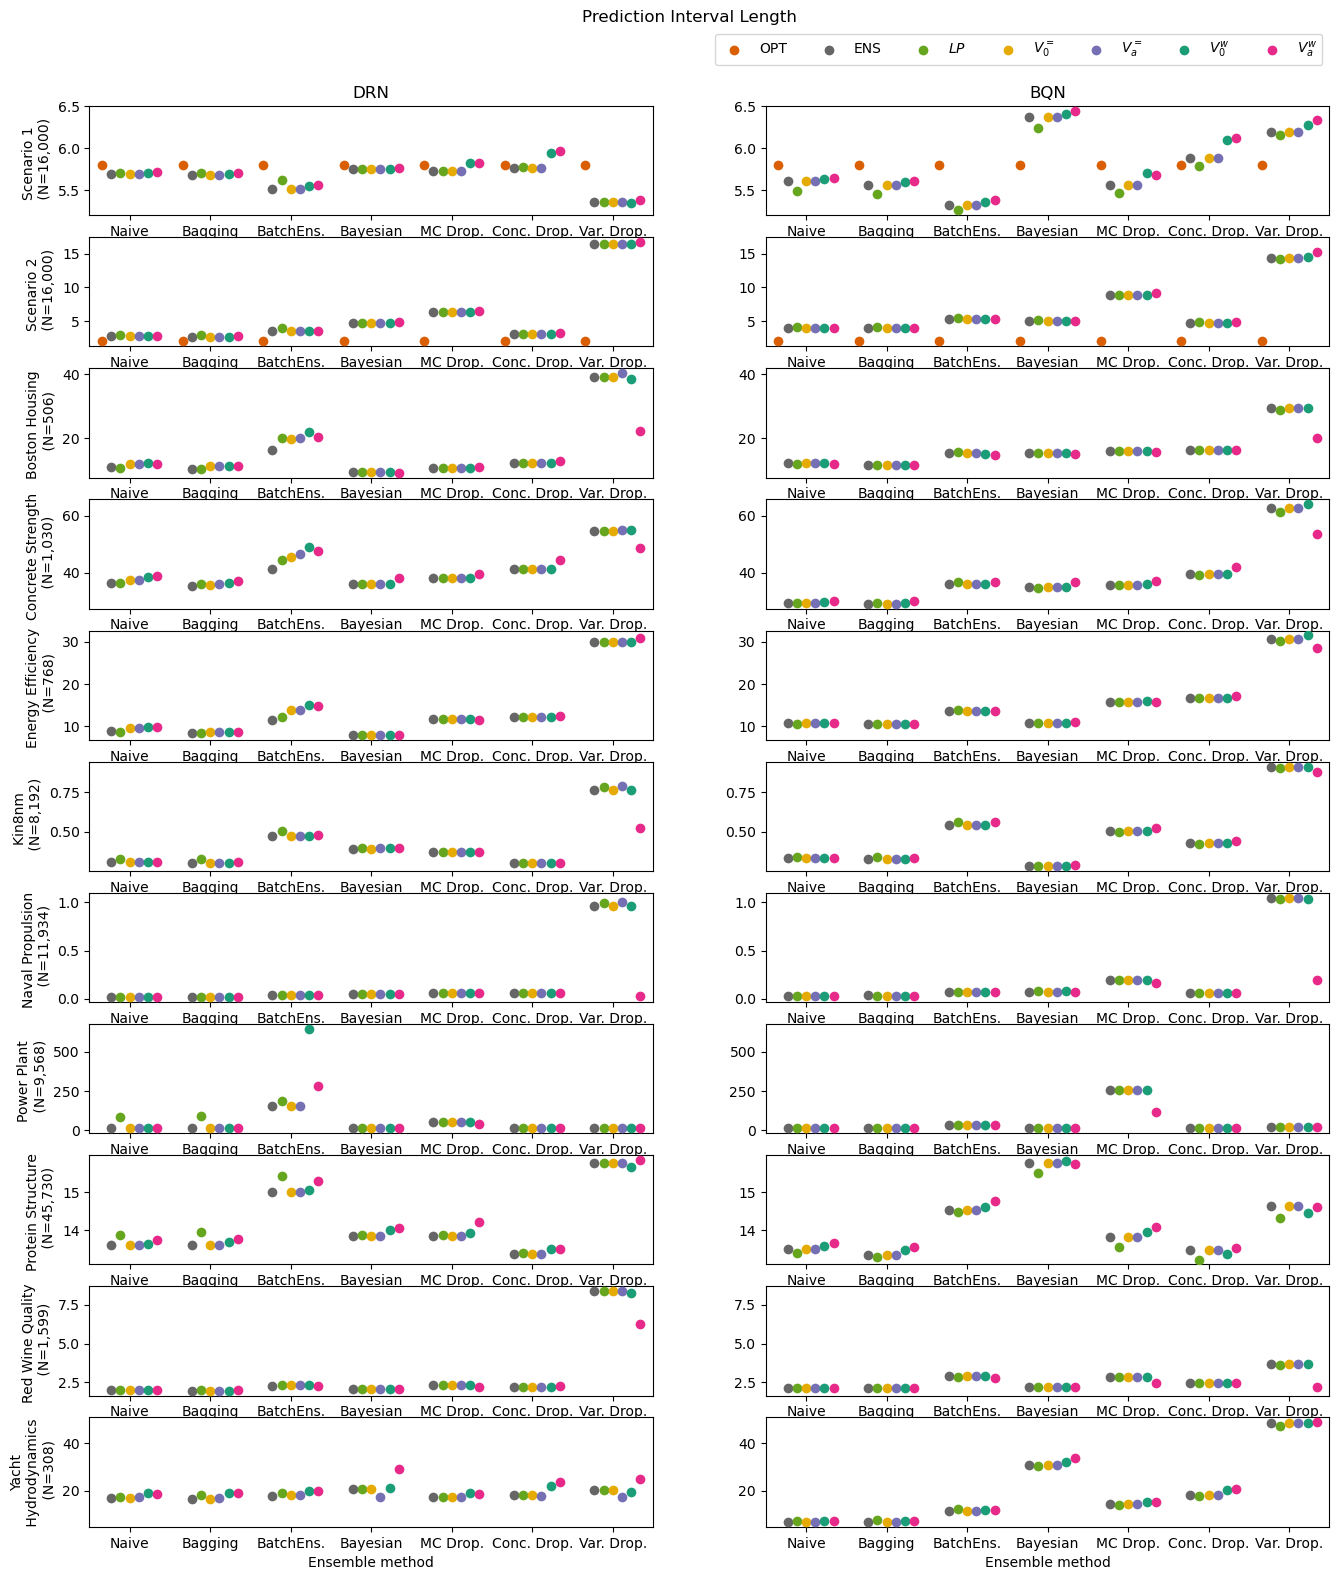

In [44]:
##### Scores - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(16,16*1.2), squeeze=False)

# Filter out optimal score
df_lgt = df[(df["metric"] == "lgt")]

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    # df_nn = pd.melt(df_scores[i_nn].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_nn].columns, value_name="score")
    df_nn = df_lgt[df_lgt["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[df_nn["dataset"] == dataset]
        
        
        # Plot boxplots
        # g = sns.stripplot(data=df_nn_dataset, x="ens_method", y="score", hue="agg", ax=axs[i_dataset][i_nn], palette=agg_col, dodge=True, s=3, facecolor="none", order=ens_method_ls)
        sns.stripplot(data=df_nn_dataset[df_nn_dataset["n_ens"] == 20], x="ens_method", y="score", hue="agg", ax=axs[i_dataset][i_nn], palette=agg_col, dodge=True, s=7, order=ens_method_ls)
        
        # Add 0 line
        # g.axhline((100 * 19 / 21), linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Ensemble method")
        

# Set y axis range
# upper_limit = np.Inf
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()

    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    

# Merge subplot legends and display figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
small_marker = matplotlib.lines.Line2D([0], [0], color=kit_cols_dict["grey"], marker="o", linestyle="none", markersize=3)  # type: ignore
big_marker = matplotlib.lines.Line2D([0], [0], color=kit_cols_dict["grey"], marker="o", linestyle="none", markersize=7)  # type: ignore
empty = matplotlib.patches.Rectangle((0,0), 1, 1, fill=False, edgecolor='none', visible=False)  # type: ignore
# handles.append(empty)
# handles.append(small_marker)
# handles.append(big_marker)
labels = [agg_labels.get(agg) for agg in labels]
# labels.append("")
# labels.append("Ensemble size < 20")
# labels.append("Ensemble size = 20")

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.85)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.891), ncol=7)
fig.suptitle(f"Prediction Interval Length", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "04_PI_length.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "04_PI_length.png")
    fig.savefig(filename, bbox_inches='tight')

## PITs

In [38]:
data_ens_path = os.path.join("data", "results", "dataset", "ens_method", "model")
data_agg_path = os.path.join("data", "results", "dataset", "ens_method", "agg")

dataset_ls = [
    "scen_1",
    "scen_4",
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]

df_plot = get_pit(paths, drn_choice, data_ens_path, data_agg_path, ens_method_ls, dataset_ls, nn_vec, agg_meths)

In [39]:
df_plot

,dataset,ens_method,nn,agg,breaks,pit
0,scen_4,rand_init,drn,ens,"[5.222051891537695e-20, 0.047618997797688495, ...","[1.5595666316943138, 0.9237909665149514, 0.888..."
1,scen_4,rand_init,drn,lp,"[4.941884972553198e-08, 0.047616077943969354, ...","[1.4193749897546755, 0.919543299939461, 0.8684..."
2,scen_4,rand_init,drn,vi,"[2.458128345190136e-16, 0.047618730706072754, ...","[1.4772548313856957, 0.9189661158780017, 0.859..."
3,scen_4,rand_init,drn,vi-a,"[4.327191435752348e-17, 0.04761867980883515, 0...","[1.457831260309739, 0.9080470137682672, 0.8505..."
4,scen_4,rand_init,drn,vi-w,"[3.0978220372914663e-16, 0.047618629487079026,...","[1.480828002812097, 0.9184430646385459, 0.8625..."
...,...,...,...,...,...,...
79,scen_4,variational_dropout,bqn,lp,"[1.0437655372842226e-07, 0.04761911811200073, ...","[0.8628906139946598, 0.726285516792536, 1.0312..."
80,scen_4,variational_dropout,bqn,vi,"[9.460034057010014e-07, 0.04761989233119394, 0...","[0.8643618385982831, 0.732271557626874, 1.0512..."
81,scen_4,variational_dropout,bqn,vi-a,"[3.7715396171075777e-07, 0.047619135461133485,...","[0.7796297366789733, 0.6840791561567017, 1.025..."
82,scen_4,variational_dropout,bqn,vi-w,"[2.657089799663892e-06, 0.04762122187599084, 0...","[0.8433685513269801, 0.7178922790615739, 1.058..."


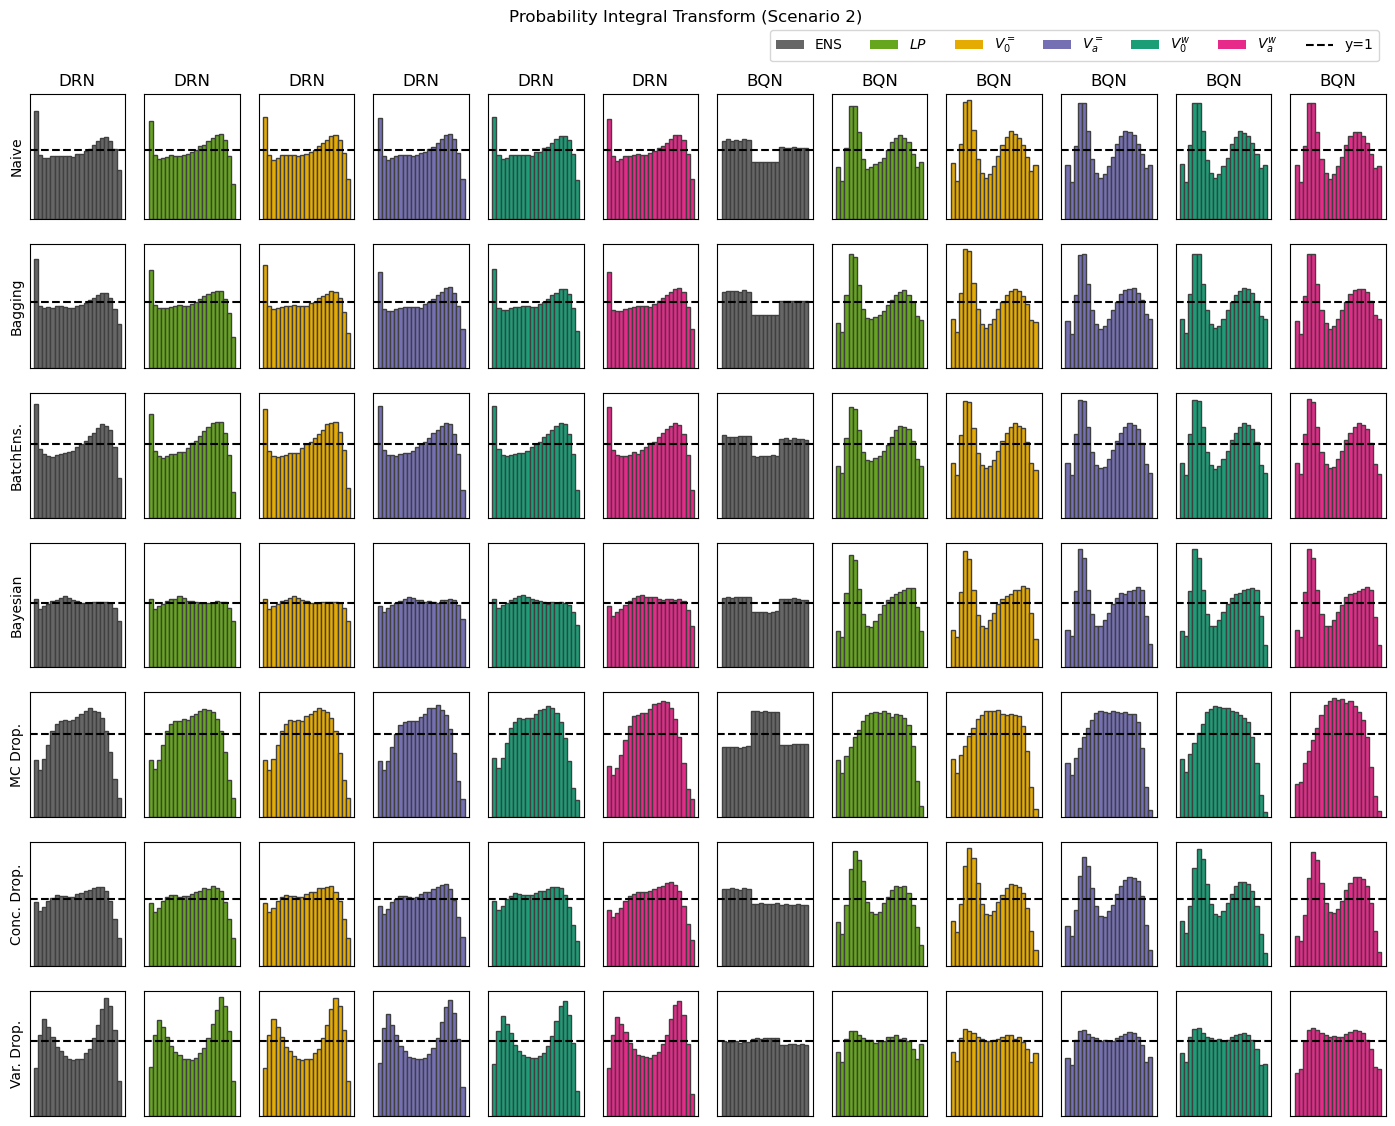

In [40]:
##### Scores - Barplot - x=ensemble_method #####


# Iterate over datasets, ens_method and nn
for i_dataset, dataset in enumerate(dataset_ls):
    # Create subplots
    fig, axs = plt.subplots(nrows=len(ens_method_ls), ncols=(len(agg_meths)+1)*len(nn_vec), figsize=(14*1.25,14), squeeze=False)
    for i_ens, ens_method in enumerate(ens_method_ls):
        for i_nn, nn in enumerate(nn_vec):
            df_temp = df_plot[(df_plot["dataset"] == dataset) & (df_plot["ens_method"] == ens_method) & (df_plot["nn"] == nn)]
            for i_agg, agg in enumerate(["ens", *agg_meths]):
                df_temp_agg = df_temp[df_temp["agg"] == agg]
                
                row = i_ens
                col = i_agg + (len(agg_meths) +1) * i_nn
                
                axs[row][col].bar(
                    df_temp_agg["breaks"].iloc[0][:-1],
                    df_temp_agg["pit"].iloc[0],
                    width=np.diff(df_temp_agg["breaks"].iloc[0]),
                    color=agg_col.get(agg),
                    edgecolor=kit_cols_dict.get("grey")
                )
                axs[row][col].axhline(y=1, linestyle="dashed", color=kit_cols_dict.get("black"))
                
            
                # Add labels to x and y axis
                axs[row][col].set_ylabel("")
                axs[row][0].set_ylabel(ens_method_labels[ens_method])
                axs[row][col].set_xlabel("")
                axs[0][col].set_title(nn.upper())
                axs[row][col].tick_params(axis="y", which="both", left=False, right=False, labelleft=False)
                axs[row][col].tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
        

    # Set y axis range
    for ax_row in axs:
        max_y = 0
        for ax_col in ax_row:
            if ax_col.get_ylim()[1] > max_y:
                max_y = ax_col.get_ylim()[1]
        for ax_col in ax_row:
            ax_col.set_ylim(0, max_y)
            
    # for ax in [item for sublist in axs for item in sublist]:
    # for ax in [item for sublist in axs for item in sublist]:
    #     ax.set_ylim(0, max_y)
        

    # # Merge subplot legends and display figure legend
    handles = []
    labels = []
    for ax in [item for sublist in axs for item in sublist]:
        curr_handles, curr_labels = ax.get_legend_handles_labels()
        for idx, check_label in enumerate(curr_labels):
            if check_label not in labels:
                handles.append(curr_handles[idx])
                labels.append(curr_labels[idx])
        ax.legend([],[], frameon=False)

    for agg in ["ens", *agg_meths]:
        handles.append(matplotlib.patches.Patch(facecolor=agg_col.get(agg), label=agg_labels.get(agg)))  # type: ignore
    handles.append(matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"], label="y=1"))  # type: ignore

    # Set titles and legends
    fig.subplots_adjust(top=0.84)
    fig.legend(handles=handles, bbox_to_anchor=(0.9, 0.8905), ncol=7)
    fig.suptitle(f"Probability Integral Transform ({dataset_labels_short.get(dataset)})", y=0.9)

    # Save figure
    if export:
        filename=os.path.join(save_dir, f"04_pit_{dataset}.pdf")
        fig.savefig(filename, bbox_inches='tight')
        filename=os.path.join(save_dir, f"04_pit_{dataset}.png")
        fig.savefig(filename, bbox_inches='tight')

# Archive

## Lineplot - Plot PI length and coverage

In [ ]:
##### Scores - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(18,18*1.4), squeeze=False)

# Filter out ensemble mean and optimal score
df_no_ens = df[(df["agg"] != "ens") & (df["agg"] != "opt") & (df["metric"] == "cov") & (df["ens_method"] == "rand_init")]

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    # df_nn = pd.melt(df_scores[i_nn].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_nn].columns, value_name="score")
    df_nn = df_no_ens[df_no_ens["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[df_nn["dataset"] == dataset]
        
        # Plot boxplots
        g = sns.lineplot(data=df_nn_dataset, x="n_ens", y="score", hue="agg", ax=axs[i_dataset][i_nn], palette=agg_col, errorbar=None)
        
        # Add 0 line
        g.axhline((100 * 19 / 21), linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        # axs[i_dataset][i_nn].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Ensemble size")
        

# Set y axis range
# upper_limit = np.Inf
# for ax_drn, ax_bqn in axs:
#     drn_l, drn_u = ax_drn.get_ylim()
#     bqn_l, bqn_u = ax_bqn.get_ylim()
#     drn_range = drn_u - drn_l
#     bqn_range = bqn_u - bqn_l

#     ax_drn.set_ylim(0, min(upper_limit, max(drn_u, bqn_u)))
#     ax_bqn.set_ylim(0, min(upper_limit, max(drn_u, bqn_u)))
    

# Merge subplot legends and display figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
handles.append(axhline)
labels = [agg_labels.get(agg) for agg in labels]
labels.append("Target coverage")

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.85)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.88), ncol=len(agg_meths)+1)
fig.suptitle(f"Coverage", y=0.9)

# Save figure
if export:
    filename=os.path.join(save_dir, "04_coverage.pdf")
    fig.savefig(filename, bbox_inches='tight')
    filename=os.path.join(save_dir, "04_coverage.png")
    fig.savefig(filename, bbox_inches='tight')